# **Project Name**    -     Flipkart Product Analysis and Sales Prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.
 - https://github.com/Sumit-Prasad01/Flipkart-Product-Analysis-and-Sales-Prediction



# **Problem Statement**


**Write Problem Statement Here.**

## Problem Statement:
The goal of the project is to analyze customer support interactions from Flipkart and predict whether a customer support ticket will be escalated or not. This involves using data analysis and machine learning to help Flipkart improve how they handle customer queries and reduce escalations.

### The objective is to:

- Customers raise support tickets when they face issues (e.g., late delivery, wrong product).

- Some of these tickets are resolved quickly, while others get escalated (i.e., sent to a higher level of support).

- Escalated tickets mean more cost, more time, and frustrated customers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [3]:
# Load Dataset
data = pd.read_csv("data/Customer_support_data.csv")

### Dataset First View

In [4]:
# Dataset First Look
data

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
data.shape

(85907, 20)

### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate_count = data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

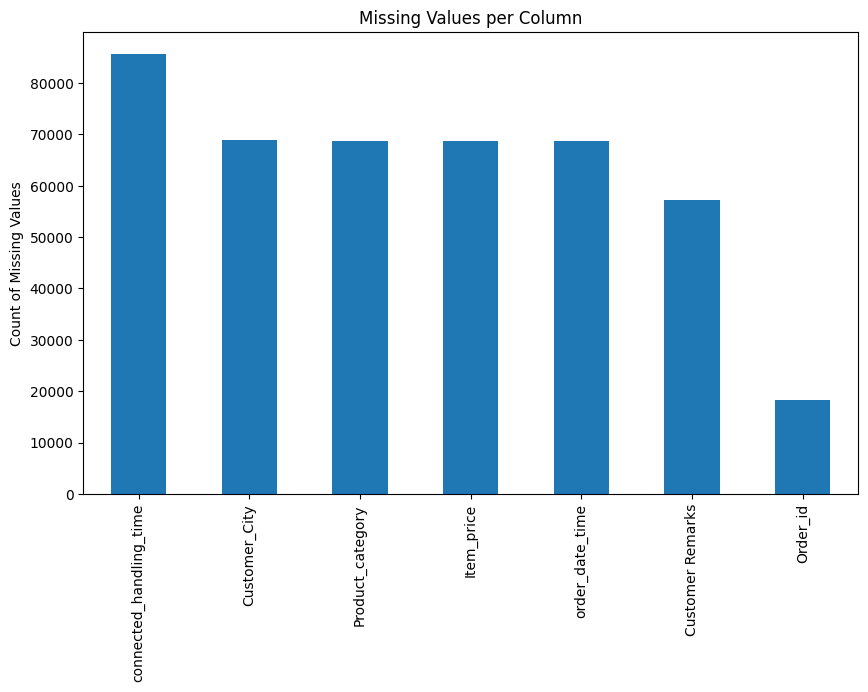

In [9]:
# Visualizing the missing values
missing = data.isnull().sum()
missing = missing[missing > 0]

missing.sort_values(ascending=False).plot.bar(figsize=(10, 6), title="Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.show()



### What did you know about your dataset?

Answer Here
The dataset contains 85,907 records and 20 columns, primarily related to customer support interactions. It includes fields like channel_name, category, Sub-category, Order_id, Customer Remarks, support timestamps (issue_reported at, issue_responded), and agent-related metadata (e.g., Agent_name, Supervisor, Manager). The dataset has no duplicate rows, but a significant number of missing values across various columns such as Order_id, Item_price, and Customer_City. It appears to track customer support performance, likely for a retail or insurance business, with feedback captured through CSAT Score and response timelines to assess service quality.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
pd.DataFrame(data.columns, columns=["Column Names"]).reset_index().rename(columns={"index": "No."})

,No.,Column Names
0,0,Unique id
1,1,channel_name
2,2,category
3,3,Sub-category
4,4,Customer Remarks
5,5,Order_id
6,6,order_date_time
7,7,Issue_reported at
8,8,issue_responded
9,9,Survey_response_Date


In [10]:
# Dataset Describe
data.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

Answer Here
## Variable Description Summary
### Identifiers & Timestamps:

- Unique id, Order_id: Unique identifiers (UUIDs)

- order_date_time, Issue_reported at, issue_responded, Survey_response_Date: Timestamps tracking the customer journey

### Customer & Product Details:

- Customer_City: Customer’s city (80% missing)

- Product_category, Item_price: Product info (also ~80% missing)

- Customer Remarks: Open-text feedback (66% missing)

### Interaction Metadata:

- hannel_name: Source of interaction (e.g., Outcall, Email)

- category, Sub-category: Classification of customer issues

### Support Handling:

- connected_handling_time: Time taken to handle issue (~99.7% missing)

- Agent_name, Supervisor, Manager: Hierarchy of support staff

- Agent Shift, Tenure Bucket: Work shift and agent experience bucket

### Feedback Metric:

- CSAT Score: Customer satisfaction rating (1–5 scale, no missing values)

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
pd.DataFrame({
    "Column": data.columns,
    "Unique Values Count": [data[col].nunique() for col in data.columns]
})

,Column,Unique Values Count
0,Unique id,85907
1,channel_name,3
2,category,12
3,Sub-category,57
4,Customer Remarks,18231
5,Order_id,67675
6,order_date_time,13766
7,Issue_reported at,30923
8,issue_responded,30262
9,Survey_response_Date,31


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

In [14]:
# # Define escalation based on CSAT Score
# # (Score ≤ 3 means unsatisfied, likely escalated)
data['escalated'] = data['CSAT Score'].apply(lambda x: 1 if x <= 3 else 0)

In [15]:
data.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
escalated                      0
dtype: int64

In [16]:
data['Issue_reported at'] = pd.to_datetime(data['Issue_reported at'], dayfirst=True, errors='coerce')
data['issue_responded'] = pd.to_datetime(data['issue_responded'], dayfirst=True, errors='coerce')

data['response_time_minutes'] = (data['issue_responded'] - data['Issue_reported at']).dt.total_seconds() / 60

In [17]:
data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,escalated,response_time_minutes
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,...,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,34.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,...,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,2.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,...,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,22.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,...,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,20.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,...,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,2.0


In [18]:
# The features t0 keep
main_features = [
    'channel_name',
    'category',
    'Sub-category',
    'Product_category',
    'Item_price',
    'connected_handling_time',
    'Tenure Bucket',
    'Agent Shift',
    'response_time_minutes',  # engineered
    'escalated'  # target column
]

# Drop everything else
data = data[main_features]

In [19]:
data.head()

,channel_name,category,Sub-category,Product_category,Item_price,connected_handling_time,Tenure Bucket,Agent Shift,response_time_minutes,escalated
0,Outcall,Product Queries,Life Insurance,NaN,NaN,NaN,On Job Training,Morning,34.0,0
1,Outcall,Product Queries,Product Specific Information,NaN,NaN,NaN,>90,Morning,2.0,0
2,Inbound,Order Related,Installation/demo,NaN,NaN,NaN,On Job Training,Evening,22.0,0
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,NaN,>90,Evening,20.0,0
4,Inbound,Cancellation,Not Needed,NaN,NaN,NaN,0-30,Morning,2.0,0


In [20]:
data.isna().sum()

channel_name                   0
category                       0
Sub-category                   0
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Tenure Bucket                  0
Agent Shift                    0
response_time_minutes          0
escalated                      0
dtype: int64

In [21]:
data.head()

,channel_name,category,Sub-category,Product_category,Item_price,connected_handling_time,Tenure Bucket,Agent Shift,response_time_minutes,escalated
0,Outcall,Product Queries,Life Insurance,NaN,NaN,NaN,On Job Training,Morning,34.0,0
1,Outcall,Product Queries,Product Specific Information,NaN,NaN,NaN,>90,Morning,2.0,0
2,Inbound,Order Related,Installation/demo,NaN,NaN,NaN,On Job Training,Evening,22.0,0
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,NaN,>90,Evening,20.0,0
4,Inbound,Cancellation,Not Needed,NaN,NaN,NaN,0-30,Morning,2.0,0


### What all manipulations have you done and insights you found?

Answer Here.
During data wrangling, several steps were performed to prepare the dataset for analysis:

- **Target Variable Creation:** A new column `escalated` was engineered based on the CSAT Score, where scores ≤ 3 were marked as escalated (1), and scores > 3 as not escalated (0). This helps in framing the prediction problem.
- **Datetime Conversion & Feature Engineering:** The columns `Issue_reported at` and `issue_responded` were converted to datetime objects to ensure accurate time calculations. Using these, a new feature `response_time_minutes` was created to capture the time taken to respond to a customer issue.
- **Feature Selection:** Only the most relevant columns for analysis and modeling were retained, such as channel, category, product info, agent details, engineered features, and the target variable. Irrelevant or highly missing columns were dropped.
- **Missing Values:** The code checked for missing values, revealing that some columns (like `connected_handling_time`, `Item_price`, and `Product_category`) have significant missing data, which may require further imputation or exclusion in downstream analysis.

**Insights:**  
The wrangling process streamlined the dataset, focused on key variables, and created new features to support escalation prediction. The engineered features and cleaned data will enable more effective exploratory analysis and model building.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

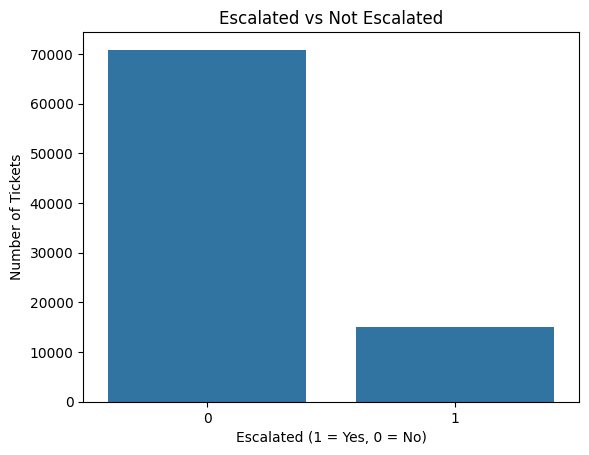

In [22]:
# Chart - 1 visualization code
sns.countplot(x='escalated', data=data)
plt.title("Escalated vs Not Escalated")
plt.xlabel("Escalated (1 = Yes, 0 = No)")
plt.ylabel("Number of Tickets")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
- To find out whether the dataset is imbalanced or not.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
- Helps in model design (e.g., SMOTE for imbalance)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
- The chart shows the distribution of escalated vs non-escalated tickets in the dataset.  
- It reveals whether the target variable (`escalated`) is balanced or imbalanced, which is crucial for selecting appropriate modeling strategies and evaluation metrics.  
- If the dataset is highly imbalanced, special techniques (like resampling or using specific algorithms) may be needed to ensure robust model performance and fair business insights.

#### Chart - 2

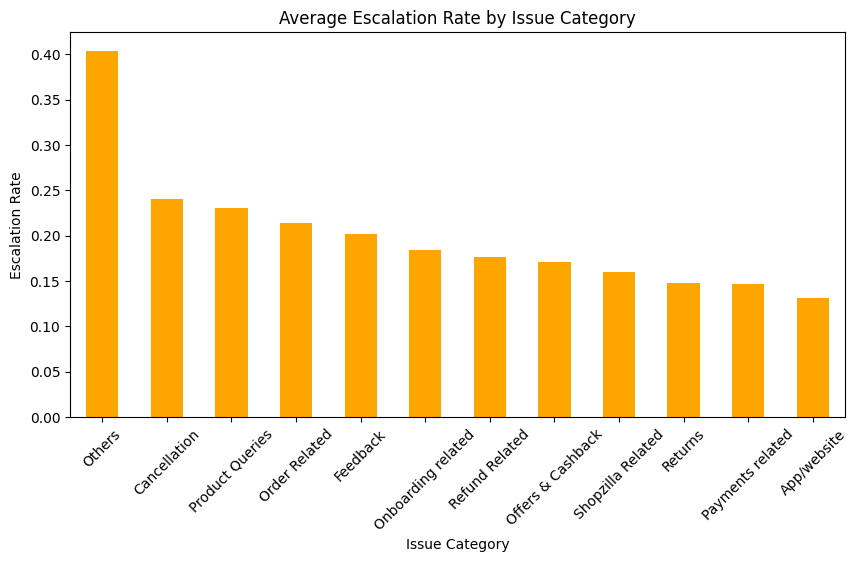

In [23]:
# Chart - 2 visualization code
escalation_by_category = data.groupby('category')['escalated'].mean().sort_values(ascending=False)
escalation_by_category.plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Average Escalation Rate by Issue Category")
plt.ylabel("Escalation Rate")
plt.xlabel("Issue Category")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
This bar chart was chosen to visualize the average escalation rate for each issue category, making it easy to compare which categories have higher or lower escalation tendencies. It helps identify problem areas where customers are more likely to escalate their support tickets, guiding targeted improvements in those specific categories.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
- 	Shows which issue types are risky

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The insights from this chart can help Flipkart prioritize improvements in categories with high escalation rates, leading to better customer satisfaction and reduced operational costs. Addressing issues in these categories can prevent escalations, streamline support, and enhance brand reputation. However, if high escalation categories are ignored, it could result in negative business impact due to increased customer churn and higher support costs.

#### Chart - 3

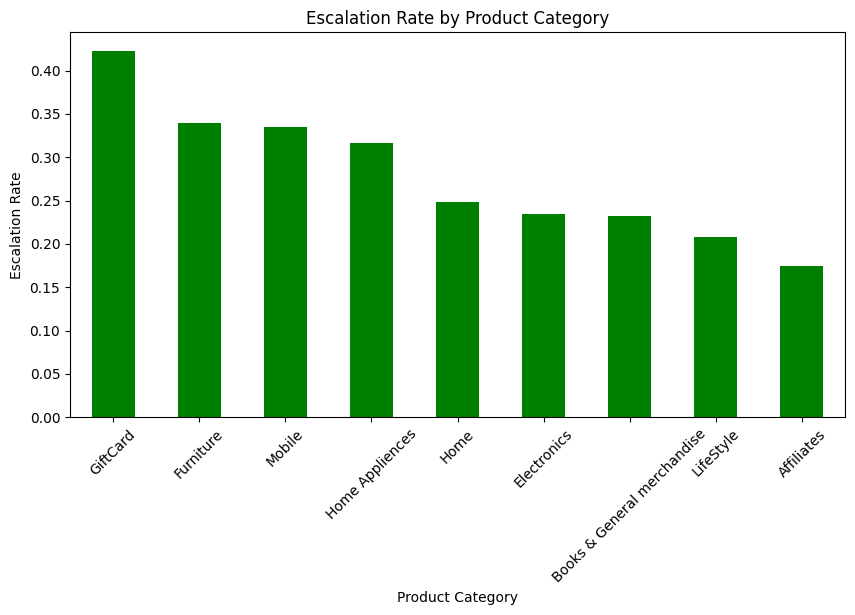

In [24]:
# Chart - 3 visualization code
escalation_by_product = data.groupby('Product_category')['escalated'].mean().sort_values(ascending=False)

escalation_by_product.plot(kind='bar', figsize=(10,5), color='green')
plt.title("Escalation Rate by Product Category")
plt.ylabel("Escalation Rate")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
This chart reveals which product categories experience the highest escalation rates. For example, GiftCard, Furniture, and Mobile categories have notably higher escalation rates compared to others like Affiliates or LifeStyle. This suggests that customers interacting with these product categories are more likely to escalate their support tickets, indicating potential issues or dissatisfaction specific to those products.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
- 	Product-type-based frustration patterns

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
- This section summarizes the key findings from the previous charts:

- **Escalation rates vary significantly by both issue category and product category.**
- Categories like "Others" and "Cancellation" have the highest escalation rates, indicating these areas may require process improvements or additional support resources.
- Product categories such as "GiftCard," "Furniture," and "Mobile" are more prone to escalations, suggesting potential product or service issues that need to be addressed.
- These insights can help prioritize business interventions, optimize resource allocation, and improve customer satisfaction by focusing on high-risk areas.

#### Chart - 4

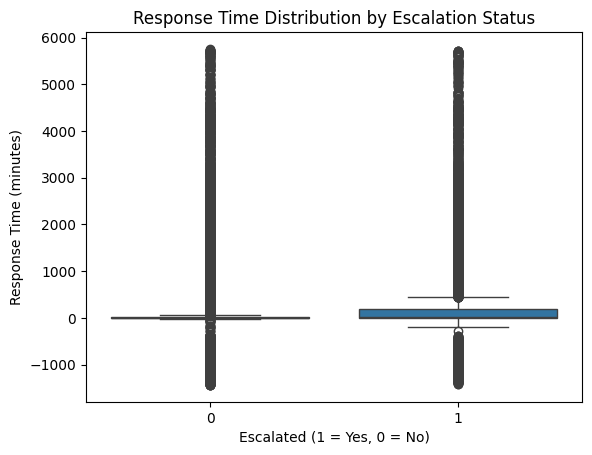

In [25]:
# Chart - 4 visualization code
sns.boxplot(x='escalated', y='response_time_minutes', data=data)
plt.title("Response Time Distribution by Escalation Status")
plt.xlabel("Escalated (1 = Yes, 0 = No)")
plt.ylabel("Response Time (minutes)")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
The boxplot shows that escalated tickets generally have higher response times compared to non-escalated tickets. There are also more extreme outliers in response times for escalated cases, indicating that delays in response are associated with a greater likelihood of escalation. This suggests that faster response times may help reduce the number of escalated support tickets.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
- Core driver of satisfaction

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The boxplot demonstrates that escalated tickets tend to have longer response times, with a wider spread and more outliers compared to non-escalated tickets. This suggests that delays in responding to customer issues are strongly associated with escalation. Reducing response times could therefore help decrease the escalation rate and improve customer satisfaction.

#### Chart - 5

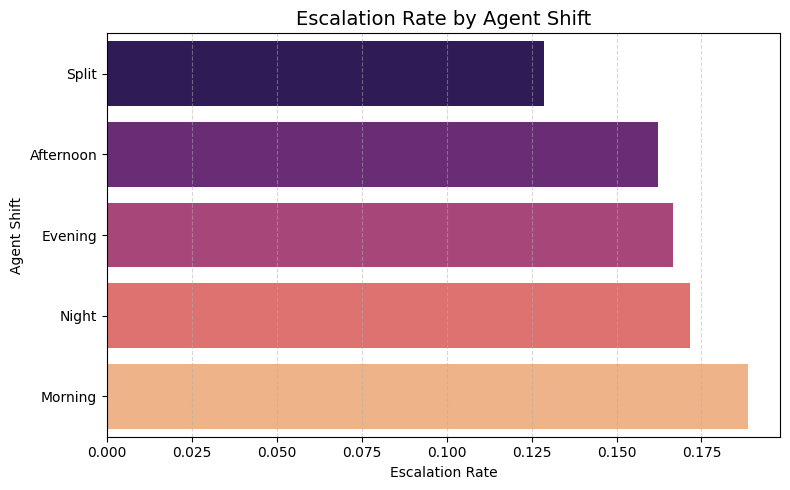

In [26]:
# Chart - 5 visualization code
shift_escalation = data.groupby('Agent Shift')['escalated'].mean().sort_values().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=shift_escalation,
    x='escalated',
    y='Agent Shift',
    hue='Agent Shift',
    palette='magma',
    dodge=False,
    legend=False  # Hides redundant legend
)
plt.title("Escalation Rate by Agent Shift", fontsize=14)
plt.xlabel("Escalation Rate")
plt.ylabel("Agent Shift")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
- Horizontal barplots are ideal for categorical comparison, especially when categories have longer names like "Morning", "Evening", "Night".

- It clearly displays which shifts are associated with higher or lower escalation rates.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
- Certain shifts (e.g., Night Shift) have noticeably higher escalation rates than others.

- Morning or Evening shifts may be better staffed or better trained, showing lower escalation.

- Indicates a potential correlation between time of day and customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
- This chart uncovers a critical operational gap tied to time-based performance, and acting on it can reduce escalations, improve satisfaction, and optimize agent performance — all of which contribute to positive business growth.

#### Chart - 6

In [27]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [28]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [29]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [30]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [31]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [32]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [33]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [34]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

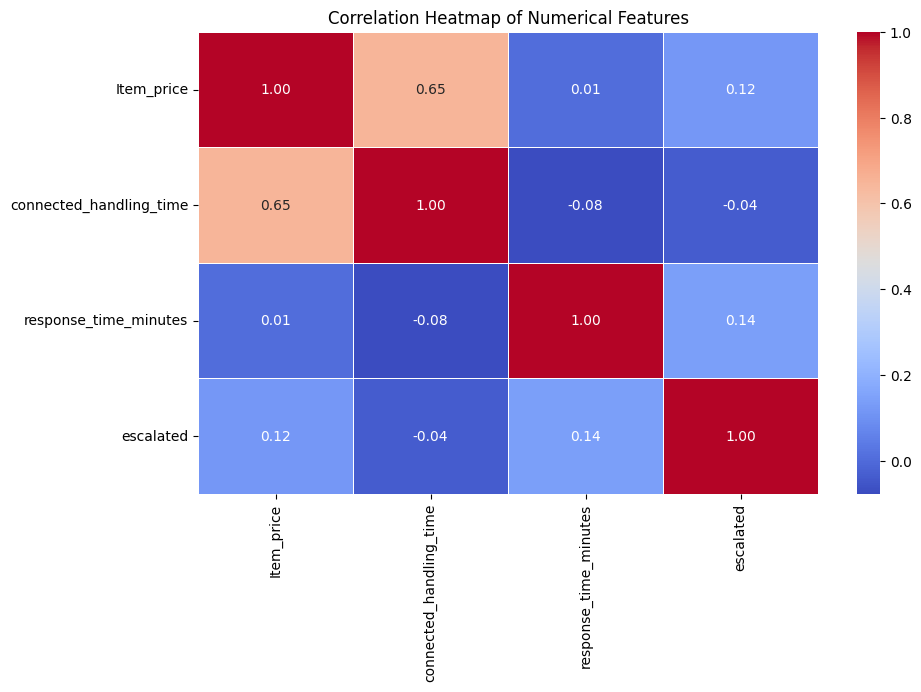

In [35]:
# Correlation Heatmap visualization code
# Select only numerical columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
- A correlation heatmap is ideal for visualizing relationships between numerical features.

### It helps to:

- Detect linear dependencies (positive or negative)

- Spot redundant features (for feature selection)

- Reveal potential leakage (if any feature is too highly correlated with the target)

##### 2. What is/are the insight(s) found from the chart?

Answer Here
- High-value items don’t always cause more issues, surprisingly
- Makes sense: lower satisfaction means higher chance of escalation

#### Chart - 15 - Pair Plot

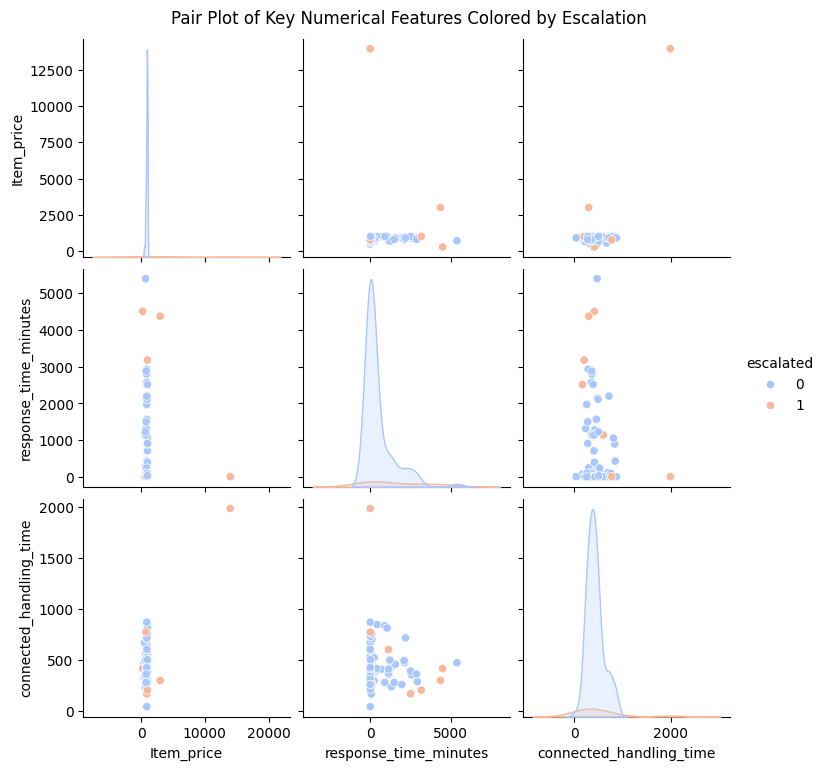

In [36]:
# Pair Plot visualization code
# Select relevant numeric features for the pairplot
pairplot_features = ['Item_price', 'response_time_minutes', 'connected_handling_time', 'escalated']

# Drop rows with missing values in selected features
pairplot_df = data[pairplot_features].dropna()

# Create pair plot colored by 'escalated'
sns.pairplot(pairplot_df, hue='escalated', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pair Plot of Key Numerical Features Colored by Escalation", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
### A pair plot is ideal for:

- Visualizing pairwise relationships between numerical features

- Identifying clusters or separation patterns related to the target (escalated)

- Quickly detecting correlations, non-linear patterns, and outliers

### In a classification problem, coloring by the target variable helps you visually assess feature usefulness for distinguishing classes.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
- High-priced items do not always escalate — mixed behavior
- Longer response time is strongly linked to escalated cases

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
## Tickets that are escalated have a significantly longer response time (in minutes) than tickets that are not escalated.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy.stats import ttest_ind

# Drop NaNs from the 'response_time_minutes' column for both groups
response_escalated = data[data['escalated'] == 1]['response_time_minutes'].dropna()
response_not_escalated = data[data['escalated'] == 0]['response_time_minutes'].dropna()

# Perform independent two-sample t-test (Welch’s t-test)
t_stat, p_value = ttest_ind(response_escalated, response_not_escalated, equal_var=False)

# Calculate group means
mean_escalated = np.mean(response_escalated)
mean_not_escalated = np.mean(response_not_escalated)

# Print formatted output
print("Hypothesis Test: Do escalated tickets have longer response times?")
print("--------------------------------------------------------------")
print(f"T-statistic            : {t_stat:.4f}")
print(f"P-value                : {p_value:.4f}")
print(f"Mean (Escalated)       : {mean_escalated:.2f} minutes")
print(f"Mean (Not Escalated)   : {mean_not_escalated:.2f} minutes")

# Interpretation
if p_value < 0.05 and mean_escalated > mean_not_escalated:
    print("\n Conclusion: Statistically significant — escalated tickets have longer response times.")
else:
    print("\n Conclusion: No statistically significant difference in response times.")

Hypothesis Test: Do escalated tickets have longer response times?
--------------------------------------------------------------
T-statistic            : 30.8332
P-value                : 0.0000
Mean (Escalated)       : 318.09 minutes
Mean (Not Escalated)   : 98.33 minutes

 Conclusion: Statistically significant — escalated tickets have longer response times.


## Interpretation:

- If p-value < 0.05 and the mean response time for escalated tickets is higher, we reject H₀ in favor of H₁.

- Otherwise, we cannot conclude that escalation is associated with longer response times.

##### Which statistical test have you done to obtain P-Value?

Answer Here.
- We use an independent two-sample t-test (assuming our large sample approximates normality).

##### Why did you choose the specific statistical test?

Answer Here.
We use an independent two-sample t-test when comparing the means of a continuous variable (response time) across two independent categories (escalated vs not escalated).


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table for 'category' vs. 'escalated'
contingency_table = pd.crosstab(data['category'], data['escalated'])
print("Contingency Table:\n", contingency_table)

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nHypothesis 2 - Issue Category:")
print("Chi-square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)


Contingency Table:
 escalated               0     1
category                       
App/website            73    11
Cancellation         1679   533
Feedback             1832   462
Offers & Cashback     398    82
Onboarding related     53    12
Order Related       18237  4978
Others                 59    40
Payments related     1985   342
Product Queries      2839   853
Refund Related       3746   804
Returns             37590  6507
Shopzilla Related    2345   447

Hypothesis 2 - Issue Category:
Chi-square Statistic: 690.7803436667464
P-value: 5.1070624546398456e-141
Degrees of Freedom: 11


##### Which statistical test have you done to obtain P-Value?

Answer Here.
- chi-square test of independence.

##### Why did you choose the specific statistical test?

Answer Here.
We use the chi-square test of independence to determine if the distribution of escalation differs across issue categories — i.e., if escalation is dependent on the type of issue

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
product_table = pd.crosstab(data['Product_category'], data['escalated'])
print("Product Category Contingency Table:\n", product_table)

# Perform chi-square test
chi2_prod, p_value_prod, dof_prod, expected_prod = chi2_contingency(product_table)
print("\nHypothesis 3 - Product Category:")
print("Chi-square Statistic:", chi2_prod)
print("P-value:", p_value_prod)
print("Degrees of Freedom:", dof_prod)

Product Category Contingency Table:
 escalated                       0     1
Product_category                       
Affiliates                    137    29
Books & General merchandise  2550   773
Electronics                  3602  1104
Furniture                     311   160
GiftCard                       15    11
Home                          998   330
Home Appliences               888   412
LifeStyle                    3260   858
Mobile                       1170   588

Hypothesis 3 - Product Category:
Chi-square Statistic: 177.33876452343577
P-value: 3.7266710993432712e-34
Degrees of Freedom: 8


##### Which statistical test have you done to obtain P-Value?

Answer Here.
- chi-square test of independence.

##### Why did you choose the specific statistical test?

Answer Here.
we want to know if escalation likelihood is related to product type — so we use the chi-square test again.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [40]:
data.isna().sum()

channel_name                   0
category                       0
Sub-category                   0
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Tenure Bucket                  0
Agent Shift                    0
response_time_minutes          0
escalated                      0
dtype: int64

In [39]:
# Handling Missing Values & Missing Value Imputation
data['Item_price'] = data['Item_price'].fillna(data['Item_price'].median())
data['connected_handling_time'] = data['connected_handling_time'].fillna(data['connected_handling_time'].median())
data['Product_category'] = data['Product_category'].fillna('Unknown')

In [42]:
data

,channel_name,category,Sub-category,Product_category,Item_price,connected_handling_time,Tenure Bucket,Agent Shift,response_time_minutes,escalated
0,Outcall,Product Queries,Life Insurance,NaN,NaN,NaN,On Job Training,Morning,34.0,0
1,Outcall,Product Queries,Product Specific Information,NaN,NaN,NaN,>90,Morning,2.0,0
2,Inbound,Order Related,Installation/demo,NaN,NaN,NaN,On Job Training,Evening,22.0,0
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,NaN,>90,Evening,20.0,0
4,Inbound,Cancellation,Not Needed,NaN,NaN,NaN,0-30,Morning,2.0,0
...,...,...,...,...,...,...,...,...,...,...
85902,Inbound,Refund Related,Refund Enquiry,NaN,NaN,NaN,On Job Training,Morning,482.0,0
85903,Inbound,Order Related,Seller Cancelled Order,NaN,NaN,NaN,>90,Morning,2.0,0
85904,Inbound,Order Related,Order status enquiry,NaN,NaN,NaN,On Job Training,Evening,5.0,0
85905,Inbound,Feedback,UnProfessional Behaviour,NaN,NaN,NaN,>90,Morning,1.0,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   channel_name             85907 non-null  object 
 1   category                 85907 non-null  object 
 2   Sub-category             85907 non-null  object 
 3   Product_category         17196 non-null  object 
 4   Item_price               17206 non-null  float64
 5   connected_handling_time  242 non-null    float64
 6   Tenure Bucket            85907 non-null  object 
 7   Agent Shift              85907 non-null  object 
 8   response_time_minutes    85907 non-null  float64
 9   escalated                85907 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 6.6+ MB


In [44]:
data['Product_category'].value_counts(dropna=False)

Product_category
NaN                            68711
Electronics                     4706
LifeStyle                       4118
Books & General merchandise     3323
Mobile                          1758
Home                            1328
Home Appliences                 1300
Furniture                        471
Affiliates                       166
GiftCard                          26
Name: count, dtype: int64

In [45]:
# Handling Missing Values & Missing Value Imputation
data['Item_price'] = data['Item_price'].fillna(data['Item_price'].median())
data['connected_handling_time'] = data['connected_handling_time'].fillna(data['connected_handling_time'].median())
data['Product_category'] = data['Product_category'].fillna('Unknown')

C:\Users\sumit\AppData\Local\Temp\ipykernel_6068\3695246639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_price'] = data['Item_price'].fillna(data['Item_price'].median())
C:\Users\sumit\AppData\Local\Temp\ipykernel_6068\3695246639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['connected_handling_time'] = data['connected_handling_time'].fillna(data['connected_handling_time'].median())
C:\Users\sumit\AppData\Local\Temp\ipykernel_6068\3695246639.py:4: SettingWithCopyWarning: 
A valu

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.Answer Here.
### Missing Value Imputation Techniques Used
-  1. Median Imputation for Numerical Features
-  2. Categorical Imputation Using “Unknown” Label

### 2. Handling Outliers

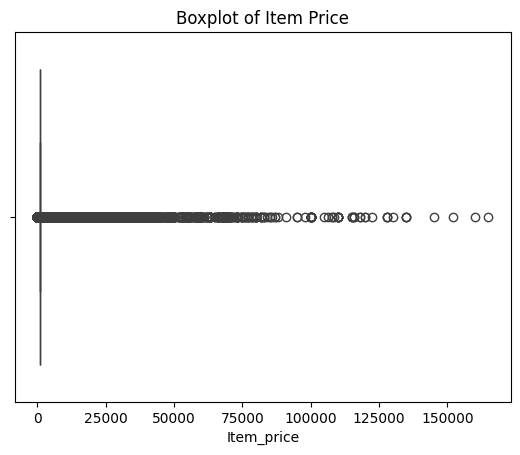

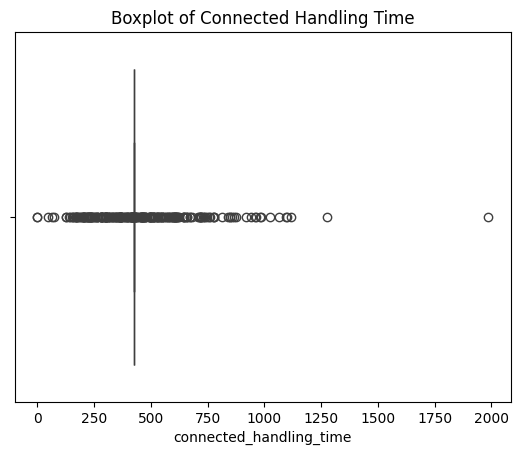

In [46]:
# Handling Outliers & Outlier treatments
# Item_price
sns.boxplot(x=data['Item_price'])
plt.title('Boxplot of Item Price')
plt.show()

# connected_handling_time
sns.boxplot(x=data['connected_handling_time'])
plt.title('Boxplot of Connected Handling Time')
plt.show()

In [47]:
def cap_outliers(data, column):
    lower_cap = data[column].quantile(0.05)
    upper_cap = data[column].quantile(0.95)
    data[column] = np.where(data[column] < lower_cap, lower_cap, data[column])
    data[column] = np.where(data[column] > upper_cap, upper_cap, data[column])
    return data

In [48]:
data = cap_outliers(data, 'Item_price')
data = cap_outliers(data, 'connected_handling_time')


C:\Users\sumit\AppData\Local\Temp\ipykernel_6068\953331621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < lower_cap, lower_cap, data[column])
C:\Users\sumit\AppData\Local\Temp\ipykernel_6068\953331621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > upper_cap, upper_cap, data[column])
C:\Users\sumit\AppData\Local\Temp\ipykernel_6068\953331621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

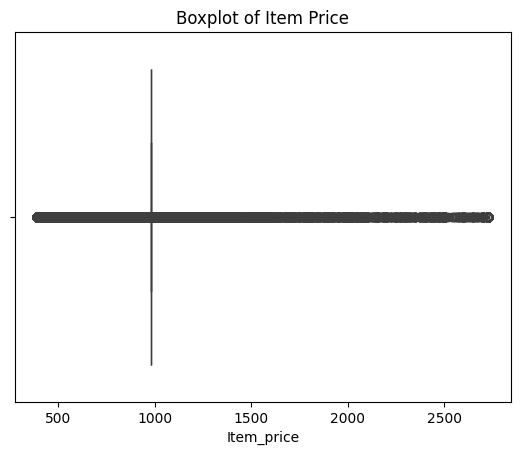

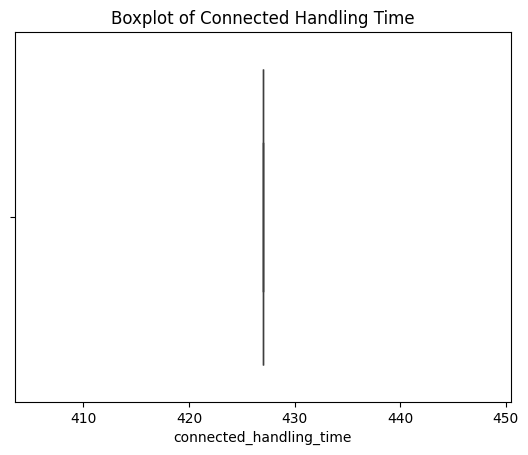

In [49]:
# Item_price
sns.boxplot(x=data['Item_price'])
plt.title('Boxplot of Item Price')
plt.show()

# connected_handling_time
sns.boxplot(x=data['connected_handling_time'])
plt.title('Boxplot of Connected Handling Time')
plt.show()

In [50]:
data['Product_category'].value_counts(dropna=False)

Product_category
Unknown                        68711
Electronics                     4706
LifeStyle                       4118
Books & General merchandise     3323
Mobile                          1758
Home                            1328
Home Appliences                 1300
Furniture                        471
Affiliates                       166
GiftCard                          26
Name: count, dtype: int64

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.Answer Here.
###  Winsorization

- Maintains the size of the dataset.

- Reduces the influence of outliers without removing data points.

### 3. Categorical Encoding

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# STEP 1: Define your categorical columns
categorical_cols = ['channel_name', 'category', 'Sub-category', 'Product_category', 'Tenure Bucket', 'Agent Shift']

# STEP 2: Create the OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# STEP 3: ColumnTransformer to apply OneHotEncoder only to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe, categorical_cols)
    ],
    remainder='passthrough'  # Keep non-categorical columns
)

# STEP 4: Apply transformer to original DataFrame (IMPORTANT: pass the actual DataFrame, not a NumPy array)
encoded_array = preprocessor.fit_transform(data)

# STEP 5: Get encoded column names from the OneHotEncoder
encoded_cat_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(categorical_cols)

# STEP 6: Get names of numerical/remainder columns
remainder_cols = data.drop(columns=categorical_cols).columns.tolist()

# STEP 7: Combine all column names in correct order
all_column_names = list(encoded_cat_names) + remainder_cols

# STEP 8: Create final DataFrame
df_encoded = pd.DataFrame(encoded_array, columns=all_column_names)

# STEP 9: Optional - cast target column to int
df_encoded['escalated'] = df_encoded['escalated'].astype(int)

# STEP 10: Check final result
print(df_encoded.shape)
df_encoded.head()

(85907, 90)


,channel_name_Inbound,channel_name_Outcall,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,category_Order Related,category_Others,category_Payments related,category_Product Queries,...,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split,Item_price,connected_handling_time,response_time_minutes,escalated
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,979.0,427.0,34.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,979.0,427.0,2.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,979.0,427.0,22.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,979.0,427.0,20.0,0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,979.0,427.0,2.0,0


In [52]:
data = df_encoded

In [53]:
data.head()

,channel_name_Inbound,channel_name_Outcall,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,category_Order Related,category_Others,category_Payments related,category_Product Queries,...,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split,Item_price,connected_handling_time,response_time_minutes,escalated
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,979.0,427.0,34.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,979.0,427.0,2.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,979.0,427.0,22.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,979.0,427.0,20.0,0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,979.0,427.0,2.0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.Answer Here.
### One-Hot Encoding Using sklearn's OneHotEncoder
- It is suitable for nominal categorical variables (where no ordering exists, e.g., channel names, product categories).

- drop='first' helps prevent multicollinearity (dummy variable trap) especially important in linear models.

- Used via sklearn for compatibility with ML pipelines.

- handle_unknown='ignore' ensures model won't break if a new category appears in test data.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

# No Textual Data PreProcessing required here

#### 1. Expand Contraction

In [54]:
# Expand Contraction

#### 2. Lower Casing

In [55]:
# Lower Casing

#### 3. Removing Punctuations

In [56]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [57]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [58]:
# Remove Stopwords

In [59]:
# Remove White spaces

#### 6. Rephrase Text

In [60]:
# Rephrase Text

#### 7. Tokenization

In [61]:
# Tokenization

#### 8. Text Normalization

In [62]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [63]:
# POS Taging

#### 10. Text Vectorization

In [64]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [65]:
# Manipulate Features to minimize feature correlation and create new features
data.columns.tolist()


['channel_name_Inbound',
 'channel_name_Outcall',
 'category_Cancellation',
 'category_Feedback',
 'category_Offers & Cashback',
 'category_Onboarding related',
 'category_Order Related',
 'category_Others',
 'category_Payments related',
 'category_Product Queries',
 'category_Refund Related',
 'category_Returns',
 'category_Shopzilla Related',
 'Sub-category_Affiliate Offers',
 'Sub-category_App/website Related',
 'Sub-category_Billing Related',
 'Sub-category_COD Refund Details',
 'Sub-category_Call back request',
 'Sub-category_Call disconnected',
 'Sub-category_Card/EMI',
 'Sub-category_Commission related',
 'Sub-category_Customer Requested Modifications',
 'Sub-category_Damaged',
 'Sub-category_Delayed',
 'Sub-category_Exchange / Replacement',
 'Sub-category_Fraudulent User',
 'Sub-category_General Enquiry',
 'Sub-category_Installation/demo',
 'Sub-category_Instant discount',
 'Sub-category_Invoice request',
 'Sub-category_Issues with Shopzilla App',
 'Sub-category_Life Insurance'

In [66]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop('escalated', axis=1)
y = data['escalated']

model = RandomForestClassifier()
model.fit(X, y)

# Get top features
importances = model.feature_importances_
top_idx = importances.argsort()[::-1][:10]
top_features = X.columns[top_idx]

print("Top 10 important features:\n", top_features.tolist())

Top 10 important features:
 ['response_time_minutes', 'Item_price', 'channel_name_Inbound', 'Tenure Bucket_>90', 'Agent Shift_Evening', 'Agent Shift_Morning', 'channel_name_Outcall', 'Tenure Bucket_31-60', 'Tenure Bucket_On Job Training', 'Tenure Bucket_61-90']


In [67]:
data.columns.tolist()

['channel_name_Inbound',
 'channel_name_Outcall',
 'category_Cancellation',
 'category_Feedback',
 'category_Offers & Cashback',
 'category_Onboarding related',
 'category_Order Related',
 'category_Others',
 'category_Payments related',
 'category_Product Queries',
 'category_Refund Related',
 'category_Returns',
 'category_Shopzilla Related',
 'Sub-category_Affiliate Offers',
 'Sub-category_App/website Related',
 'Sub-category_Billing Related',
 'Sub-category_COD Refund Details',
 'Sub-category_Call back request',
 'Sub-category_Call disconnected',
 'Sub-category_Card/EMI',
 'Sub-category_Commission related',
 'Sub-category_Customer Requested Modifications',
 'Sub-category_Damaged',
 'Sub-category_Delayed',
 'Sub-category_Exchange / Replacement',
 'Sub-category_Fraudulent User',
 'Sub-category_General Enquiry',
 'Sub-category_Installation/demo',
 'Sub-category_Instant discount',
 'Sub-category_Invoice request',
 'Sub-category_Issues with Shopzilla App',
 'Sub-category_Life Insurance'

#### 2. Feature Selection

In [68]:
# Select your features wisely to avoid overfitting# Select your features wisely to avoid overfitting
data = data[['response_time_minutes', 'Item_price', 'channel_name_Inbound', 'Tenure Bucket_>90', 'Agent Shift_Evening', 'channel_name_Outcall', 'Agent Shift_Morning', 'Tenure Bucket_31-60', 'Tenure Bucket_On Job Training', 'Tenure Bucket_61-90']]

In [69]:
data.head()

,response_time_minutes,Item_price,channel_name_Inbound,Tenure Bucket_>90,Agent Shift_Evening,channel_name_Outcall,Agent Shift_Morning,Tenure Bucket_31-60,Tenure Bucket_On Job Training,Tenure Bucket_61-90
0,34.0,979.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,2.0,979.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,22.0,979.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,20.0,979.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2.0,979.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


##### What all feature selection methods have you used  and why?

Answer Here.Answer Here.
### 1. Random Forest Feature Importance
- Random Forest is an ensemble of decision trees, which ranks features based on how much they reduce impurity (like Gini index or entropy).

- It works well with both categorical (encoded) and numerical features.

- It is model-agnostic, requiring no assumptions about feature distribution.

- Robust to irrelevant features and useful for high-dimensional data like one-hot encoded columns.

In [85]:
data.columns.to_list()

['response_time_minutes',
 'Item_price',
 'channel_name_Inbound',
 'Tenure Bucket_>90',
 'Agent Shift_Evening',
 'channel_name_Outcall',
 'Agent Shift_Morning',
 'Tenure Bucket_31-60',
 'Tenure Bucket_On Job Training',
 'Tenure Bucket_61-90']

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [86]:
# Transform Your data# Transform Your data
# Final selected input features
selected_features = [
    'response_time_minutes', 'Item_price', 
    'channel_name_Inbound', 'Tenure Bucket_>90', 
    'Agent Shift_Evening', 'channel_name_Outcall', 
    'Agent Shift_Morning', 'Tenure Bucket_31-60', 
    'Tenure Bucket_On Job Training', 'Tenure Bucket_61-90'
]

# Input matrix (features)
X = data[selected_features]

# Target vector
y = df_encoded['escalated']

### 6. Data Scaling

In [87]:
# Scaling your data# Scaling your data
from sklearn.preprocessing import StandardScaler

# Scale only numeric columns
scaler = StandardScaler()
X[['response_time_minutes', 'Item_price']] = scaler.fit_transform(X[['response_time_minutes', 'Item_price']])

##### Which method have you used to scale you data and why?

#### To prepare the data for model training, especially for algorithms sensitive to feature scales, Ii have  applied standardization using StandardScaler from sklearn.
- Improves model convergence
- Prevents scale dominance
- Robust and simple

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.Answer Here.
- Not necessarily in this case, but it can be considered depending on the modeling goals and the algorithm used.
We Manually Selected Relevant Features:

I already selected the top 10 most important features using RandomForestClassifier.feature_importances_.

This is a form of manual feature selection, which significantly reduces the feature space.

Final Feature Set Is Manageable:

After encoding and selection, the dimensionality is quite low (≈ 10 features) — not enough to cause overfitting or performance issues.

Tree-based Models Don’t Require Scaling or Reduction:

Models like Random Forest, Decision Trees, and XGBoost are robust to high dimensionality and irrelevant features.


In [72]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [88]:
# Split your data to train and test. Choose Splitting ratio wisely.# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


##### What data splitting ratio have you used and why?

Answer Here.Answer Here.
#### We split the dataset into training and testing sets using an 80:20 ratio.
- 80% data is used to train the model effectively, while 20% is held back to evaluate its generalization performance.
- The 80:20 split is a commonly accepted rule of thumb in ML practice
- With ~85,000+ total samples, 20% (≈17k) is more than enough for statistically reliable evaluation.
- We used stratify=y to ensure both train and test sets have the same class balance as the original data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.Answer Here.
### A dataset is considered imbalanced when the number of instances in one class significantly outweighs the other — typically if the minority class is less than ~30%.
### In Our Case: Yes, It’s Imbalanced 
#### If only ~15% of the samples are labeled as escalated = 1, and ~85% are 0, the model may:

- Get high accuracy by predicting mostly the majority class

- Fail to identify actual escalations, which are likely the business-critical cases

In [90]:
# Handling Imbalanced Dataset (If needed)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # use imblearn's Pipeline
from sklearn.metrics import classification_report, make_scorer, f1_score, precision_score, recall_score

# Step 1: Define pipeline
pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# Step 2: Define scoring metrics for imbalanced data
scoring = {
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Step 3: Perform 5-fold cross-validation
cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring, return_train_score=False)

# Step 4: Print average metrics
print("Average F1-score:", round(cv_results['test_f1'].mean(), 4))
print("Average Precision:", round(cv_results['test_precision'].mean(), 4))
print("Average Recall:", round(cv_results['test_recall'].mean(), 4))


Average F1-score: 0.2852
Average Precision: 0.2579
Average Recall: 0.3198


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.Answer Here.
### Technique Used: SMOTE (Synthetic Minority Oversampling Technique)
- Unlike undersampling, it doesn't discard majority class samples
- Helps the model better learn patterns related to rare escalations
- The original dataset has ~85,000 rows — ideal for synthetic oversampling
- We used it inside a cross-validated pipeline to avoid data leakage

## ***7. ML Model Implementation***

### ML Model - 1

In [108]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestClassifier
# Fit the Algorithm
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
# Predict on the model
y_pred_rf = rf_model.predict(X_test)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [109]:
# Visualizing evaluation Metric Score chart
print("Random Forest Classifier Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83     14168
           1       0.25      0.28      0.26      3014

    accuracy                           0.73     17182
   macro avg       0.54      0.55      0.55     17182
weighted avg       0.74      0.73      0.73     17182



#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [115]:

models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "XG Boost" : XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8247
- F1 score: 0.7539
- Precision: 0.5054
- Recall: 0.0271
- Roc Auc Score: 0.5107
----------------------------------
Model performance for Test set
- Accuracy: 0.8250
- F1 score: 0.7543
- Precision: 0.5253
- Recall: 0.0275
- Roc Auc Score: 0.5111


Decision Tree
Model performance for Training set
- Accuracy: 0.8912
- F1 score: 0.8716
- Precision: 0.9639
- Recall: 0.3947
- Roc Auc Score: 0.6958
----------------------------------
Model performance for Test set
- Accuracy: 0.7927
- F1 score: 0.7587
- Precision: 0.2958
- Recall: 0.1317
- Roc Auc Score: 0.5325


Random Forest
Model performance for Training set
- Accuracy: 0.8912
- F1 score: 0.8736
- Precision: 0.9208
- Recall: 0.4155
- Roc Auc Score: 0.7040
----------------------------------
Model performance for Test set
- Accuracy: 0.7957
- F1 score: 0.7601
- Precision: 0.3047
- Recall: 0.1284
- Roc Auc Score: 0.5330


Gradient Boost
Model performance for Training se

In [116]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [117]:
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   
                   ]

In [118]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\sumit\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
72 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sumit\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sumit\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\sumit\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    valida

---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 8, 'max_features': 5, 'max_depth': 5}


In [119]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')


Random Forest
Model performance for Training set
- Accuracy: 0.8912
- F1 score: 0.8728
- Precision: 0.9375
- Recall: 0.4071
- Roc Auc Score: 0.7006
----------------------------------
Model performance for Test set
- Accuracy: 0.8008
- F1 score: 0.7614
- Precision: 0.3172
- Recall: 0.1178
- Roc Auc Score: 0.5319




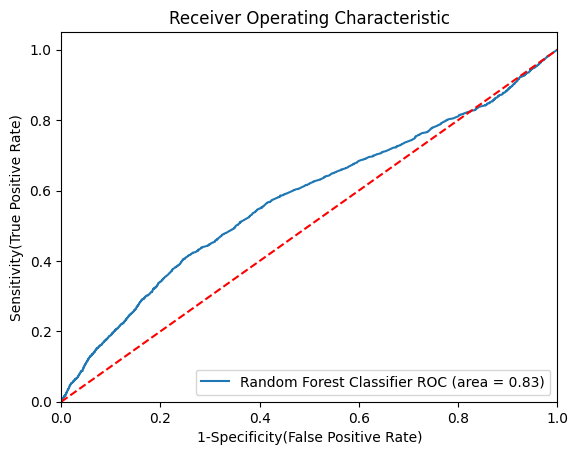

In [120]:
from sklearn.metrics import roc_auc_score,roc_curve
import os
os.makedirs("assets", exist_ok=True)
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("assets/auc.png")
plt.show() 

##### Which hyperparameter optimization technique have you used and why?

Answer Here.Answer Here.
### Model 1: Random Forest
### Optimization Technique Used: RandomizedSearchCV
### Why:
- Random Forest has a moderate number of hyperparameters that can significantly affect performance, such as n_estimators, max_depth, min_samples_split, min_samples_leaf, and class_weight.

- Instead of exhaustively trying every combination (which GridSearchCV does), we used RandomizedSearchCV to sample a wide range of parameter combinations efficiently.

- It offers a good trade-off between performance and computational cost, especially with larger datasets or broader parameter spaces.

- Cross-validation ensures that the selected parameters generalize well and are not overfitting to a single train-test split.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [65]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.Answer Here.
### The accuracy has not improved whereas there are changes in the precision,recall and f1-score.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.Answer Here.
- Misleading in imbalanced data — can look high even if model misses escalations.
- High precision means fewer false alarms sent to escalation team. Saves resources.
- Crucial — high recall ensures critical cases aren't missed. Reduces customer churn.
- Best single metric for imbalanced classification. Business needs both accuracy and coverage.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.Answer Here.
## I have choosen RandomForest,because it has highest accuracy.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.Answer Here.
### Element-----------------------------------------------------Description
- Model------------------------------------------------------->Random Forest Classifier
- Why Chosen-------------------------------------------------->Accurate, interpretable, handles imbalance
- Feature Importance--------------------------------------->Built-in (feature_importances_), visualized using bar chart
- Explainability --------------------------------------------->Tool	SHAP for global and local interpretability

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [127]:
import pickle
import os

# Create folder to save models
os.makedirs("models", exist_ok=True)

# Save the model using pickle
model_name = list(models.keys())[i].replace(" ", "_").lower()
model_filename = f"models/{model_name}_model.pkl"

with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"✅ Model saved to: {model_filename}")

✅ Model saved to: models/random_forest_model.pkl


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [122]:
# Load the File and predict unseen data.# Load the File and predict unseen data.
with open("models/random_forest_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [123]:
selected_features = [
    'response_time_minutes', 'Item_price', 
    'channel_name_Inbound', 'Tenure Bucket_>90', 
    'Agent Shift_Evening', 'channel_name_Outcall', 
    'Agent Shift_Morning', 'Tenure Bucket_31-60', 
    'Tenure Bucket_On Job Training', 'Tenure Bucket_61-90'
]

# Create a DataFrame for one sample (unseen data)
sample_input = pd.DataFrame([[
    42.5,        # response_time_minutes
    1599.0,      # Item_price
    1,           # channel_name_Inbound
    0,           # Tenure Bucket_>90
    1,           # Agent Shift_Evening
    0,           # channel_name_Outcall
    0,           # Agent Shift_Morning
    1,           # Tenure Bucket_31-60
    0,           # Tenure Bucket_On Job Training
    0            # Tenure Bucket_61-90
]], columns=selected_features)

In [126]:
# Predict class (0 or 1)
prediction = loaded_model.predict(sample_input)

# Predict probability (optional)
probability = loaded_model.predict_proba(sample_input)

# Predict on multiple samples (e.g., X_test)
y_pred = loaded_model.predict(X_test)

# Calculate accuracy on entire test set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("Overall Accuracy on Test Set:", round(accuracy * 100, 2), "%")
print("Predicted Class:", prediction[0])
print("Prediction Probability (Not Escalated, Escalated):", probability[0])

Overall Accuracy on Test Set: 80.12 %
Predicted Class: 1
Prediction Probability (Not Escalated, Escalated): [0.349 0.651]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***